In [66]:
pip install pycoingecko

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from collections import defaultdict
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import requests
import json
cg = CoinGeckoAPI()

In [69]:
url = "https://api.coingecko.com/api/v3/coins/list?include_platform=true&x_cg_api_key=CG-MW2GUotXN1v7GqXTiCLgQBqU"
headers = {"accept": "application/json"}
response = requests.get(url, headers=headers)

coin_df = pd.DataFrame(json.loads(response.text))

In [70]:
coin_df

,id,symbol,name,platforms
0,01coin,zoc,01coin,{}
1,0chain,zcn,Zus,{'ethereum': '0xb9ef770b6a5e12e45983c5d8054525...
2,0-knowledge-network,0kn,0 Knowledge Network,{'ethereum': '0x4594cffbfc09bc5e7ecf1c2e1c1e24...
3,0-mee,ome,O-MEE,{'ethereum': '0xbd89b8d708809e7022135313683663...
4,0vix-protocol,vix,0VIX Protocol,{}
...,...,...,...,...
14059,zynecoin,zyn,Zynecoin,{}
14060,zynergy,zyn,Zynergy,{'zksync': '0x0231b3de40b6b3bdd28dcef037f1b7a3...
14061,zyrri,zyr,Zyrri,{}
14062,zyx,zyx,ZYX,{'ethereum': '0xf974b5f9ac9c6632fee8b76c61b024...


## Data Extraction and Exploration

#### Crypto data

In [6]:
coin_df[coin_df['name'] == 'USDC']
# Listing the name and their ids so we can extract the prices using id
# 1. Bitcoin: bitcoin
# 2. Ethereum: ethereum
# 3. Tether: tether
# 4. BNB: binancecoin
# 5. Solana: solana
# 6. USDC: usd-coin
# 7. XRP: ripple
# 8. Dogecoin: dogecoin
# 9. Toncoin: the-open-network
# 10. Cardano: cardano

# These are the top 10 cryptocurrencies in terms of the market cap

,id,symbol,name,platforms
12746,usd-coin,usdc,USDC,{'ethereum': '0xa0b86991c6218b36c1d19d4a2e9eb0...


In [7]:
# Bitcoin
ohlc = cg.get_coin_ohlc_by_id(id="bitcoin", vs_currency="usd", days="365")
btc = pd.DataFrame(ohlc)
btc.columns = ["date", "open", "high", "low", "close"]
btc["date"] = pd.to_datetime(btc["date"], unit="ms")

In [8]:
btc.head(3)

,date,open,high,low,close
0,2023-04-29,29488.0,29545.0,28969.0,29340.0
1,2023-05-03,29336.0,29945.0,27722.0,28654.0
2,2023-05-07,28701.0,29741.0,28190.0,28888.0


In [9]:
# ETH
ohlc = cg.get_coin_ohlc_by_id(id="ethereum", vs_currency="usd", days="365")
eth = pd.DataFrame(ohlc)
eth.columns = ["date", "open", "high", "low", "close"]
eth["date"] = pd.to_datetime(eth["date"], unit="ms")

In [10]:
eth.head(3)

,date,open,high,low,close
0,2023-04-29,1910.00,1922.57,1880.33,1894.43
1,2023-05-03,1892.78,1938.11,1811.06,1870.83
2,2023-05-07,1872.31,2008.76,1845.91,1900.41


In [11]:
# 3. Tether: tether
ohlc = cg.get_coin_ohlc_by_id(id="tether", vs_currency="usd", days="365")
tether = pd.DataFrame(ohlc)
tether.columns = ["date", "open", "high", "low", "close"]
tether["date"] = pd.to_datetime(tether["date"], unit="ms")

In [12]:
tether.head(3)

,date,open,high,low,close
0,2023-04-29,1.001,1.005,0.997392,1.001
1,2023-05-03,1.001,1.010,0.995858,1.001
2,2023-05-07,1.002,1.013,0.988968,1.002


In [13]:
# 4. BNB: binancecoin
ohlc = cg.get_coin_ohlc_by_id(id="binancecoin", vs_currency="usd", days="365")
bnb = pd.DataFrame(ohlc)
bnb.columns = ["date", "open", "high", "low", "close"]
bnb["date"] = pd.to_datetime(bnb["date"], unit="ms")

In [14]:
bnb.head(3)

,date,open,high,low,close
0,2023-04-29,331.11,331.11,319.88,324.48
1,2023-05-03,324.50,339.46,320.91,322.21
2,2023-05-07,322.18,329.58,319.40,322.70


In [15]:
# 5. Solana: solana
ohlc = cg.get_coin_ohlc_by_id(id="solana", vs_currency="usd", days="365")
solana = pd.DataFrame(ohlc)
solana.columns = ["date", "open", "high", "low", "close"]
solana["date"] = pd.to_datetime(solana["date"], unit="ms")

In [16]:
solana.head(3)

,date,open,high,low,close
0,2023-04-29,22.35,23.44,22.23,23.37
1,2023-05-03,23.37,23.90,21.65,22.26
2,2023-05-07,22.28,23.23,21.26,21.99


In [20]:
# 6. USDC: usd-coin
ohlc = cg.get_coin_ohlc_by_id(id='usd-coin', vs_currency="usd", days="365")
usdc = pd.DataFrame(ohlc)
usdc.columns = ["date", "open", "high", "low", "close"]
usdc["date"] = pd.to_datetime(usdc["date"], unit="ms")

In [21]:
usdc.head(3)

,date,open,high,low,close
0,2023-04-29,1.001000,1.003,0.994044,1.000000
1,2023-05-03,0.999694,1.010,0.994826,0.998538
2,2023-05-07,1.001000,1.012,0.989722,0.999246


In [22]:
# 7. XRP: ripple
ohlc = cg.get_coin_ohlc_by_id(id='ripple', vs_currency="usd", days="365")
ripple = pd.DataFrame(ohlc)
ripple.columns = ["date", "open", "high", "low", "close"]
ripple["date"] = pd.to_datetime(ripple["date"], unit="ms")

In [71]:
ripple.head(3)

,date,open,high,low,close
0,2023-04-29,0.466951,0.480212,0.464519,0.480183
1,2023-05-03,0.479934,0.485298,0.457783,0.465035
2,2023-05-07,0.465183,0.469072,0.451560,0.460065


In [27]:
# 8. Dogecoin: dogecoin
ohlc = cg.get_coin_ohlc_by_id(id='dogecoin', vs_currency="usd", days="365")
doge = pd.DataFrame(ohlc)
doge.columns = ["date", "open", "high", "low", "close"]
doge["date"] = pd.to_datetime(doge["date"], unit="ms")

In [28]:
doge.head(3)

,date,open,high,low,close
0,2023-04-29,0.080224,0.080612,0.079400,0.080432
1,2023-05-03,0.080466,0.081878,0.077769,0.078825
2,2023-05-07,0.078908,0.081225,0.076363,0.076913


In [29]:
# 9. Toncoin: the-open-network
ohlc = cg.get_coin_ohlc_by_id(id='the-open-network', vs_currency="usd", days="365")
toncoin = pd.DataFrame(ohlc)
toncoin.columns = ["date", "open", "high", "low", "close"]
toncoin["date"] = pd.to_datetime(toncoin["date"], unit="ms")

In [30]:
toncoin.head(3)

,date,open,high,low,close
0,2023-04-29,2.21,2.21,2.15,2.16
1,2023-05-03,2.16,2.19,2.07,2.11
2,2023-05-07,2.11,2.13,2.03,2.09


In [31]:
# 10. Cardano: cardano
ohlc = cg.get_coin_ohlc_by_id(id='cardano', vs_currency="usd", days="365")
cardano = pd.DataFrame(ohlc)
cardano.columns = ["date", "open", "high", "low", "close"]
cardano["date"] = pd.to_datetime(cardano["date"], unit="ms")

In [32]:
cardano.head(3)

,date,open,high,low,close
0,2023-04-29,0.410247,0.411308,0.398754,0.405229
1,2023-05-03,0.405062,0.414135,0.382410,0.391565
2,2023-05-07,0.392173,0.396956,0.375610,0.380261


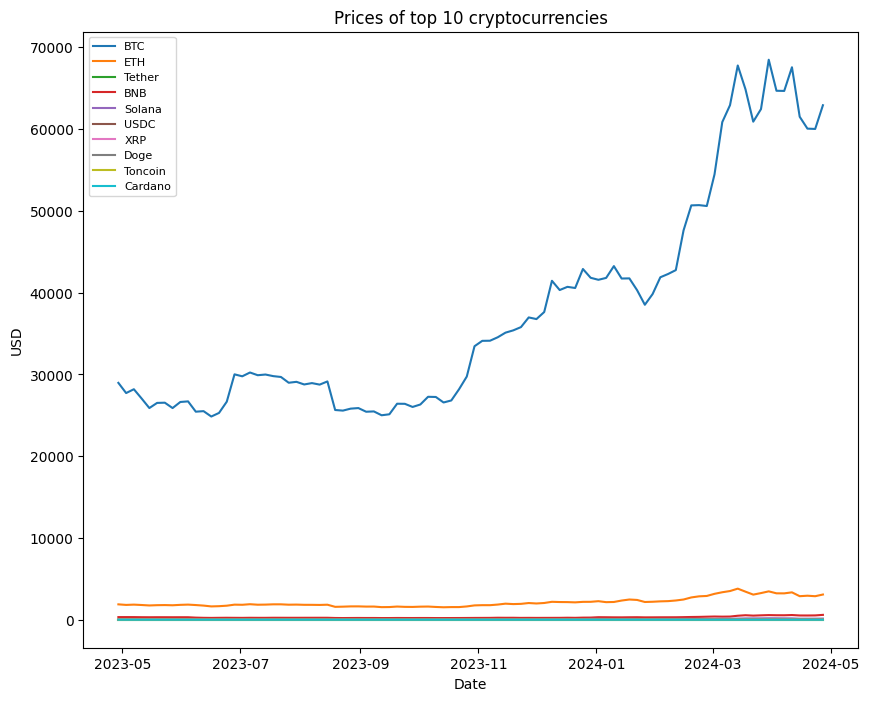

In [33]:
plt.figure(figsize = (10,8))

plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Prices of top 10 cryptocurrencies')

plt.plot(btc['date'], btc['low'])
plt.plot(eth['date'], eth['low'])
plt.plot(tether['date'], tether['low'])
plt.plot(bnb['date'], bnb['low'])
plt.plot(solana['date'], solana['low'])
plt.plot(usdc['date'], usdc['low'])
plt.plot(ripple['date'], ripple['low'])
plt.plot(doge['date'], doge['low'])
plt.plot(toncoin['date'], toncoin['low'])
plt.plot(cardano['date'], cardano['low'])

plt.legend(['BTC', 'ETH', 'Tether', 'BNB', 'Solana', 'USDC', 'XRP', 'Doge', 'Toncoin', 'Cardano'], prop = {"size":8}, loc=0, frameon=True)

plt.show()

In [34]:
crypto_df = pd.concat([btc['date'], btc['low'], eth['low'], tether['low'], bnb['low'], solana['low'],
                        usdc['low'], ripple['low'], doge['low'], toncoin['low'], cardano['low']],
                        axis=1)

crypto_df.columns = ['date', 'BTC', 'ETH', 'Tether', 'BNB', 'Solana', 'USDC', 'XRP', 'Doge', 'Toncoin', 'Cardano']

crypto_df
# using the low price as the main variables for our analysis

,date,BTC,ETH,Tether,BNB,Solana,USDC,XRP,Doge,Toncoin,Cardano
0,2023-04-29,28969.0,1880.33,0.997392,319.88,22.23,0.994044,0.464519,0.079400,2.15,0.398754
1,2023-05-03,27722.0,1811.06,0.995858,320.91,21.65,0.994826,0.457783,0.077769,2.07,0.382410
2,2023-05-07,28190.0,1845.91,0.988968,319.40,21.26,0.989722,0.451560,0.076363,2.03,0.375610
3,2023-05-11,27058.0,1800.12,0.984874,307.46,20.25,0.981219,0.416187,0.070968,1.90,0.355873
4,2023-05-15,25889.0,1745.22,0.993962,301.69,19.86,0.992729,0.413653,0.069663,1.78,0.351270
...,...,...,...,...,...,...,...,...,...,...,...
87,2024-04-11,67569.0,3347.39,0.995748,573.20,163.95,0.991681,0.589537,0.182165,5.33,0.563791
88,2024-04-15,61514.0,2878.22,0.990818,520.16,124.21,0.971922,0.435535,0.135795,5.50,0.411459
89,2024-04-19,60062.0,2936.48,0.996702,517.23,126.94,0.993055,0.476631,0.141312,5.83,0.430870
90,2024-04-23,60022.0,2876.08,0.995231,526.69,128.90,0.991706,0.469073,0.140188,5.85,0.425540


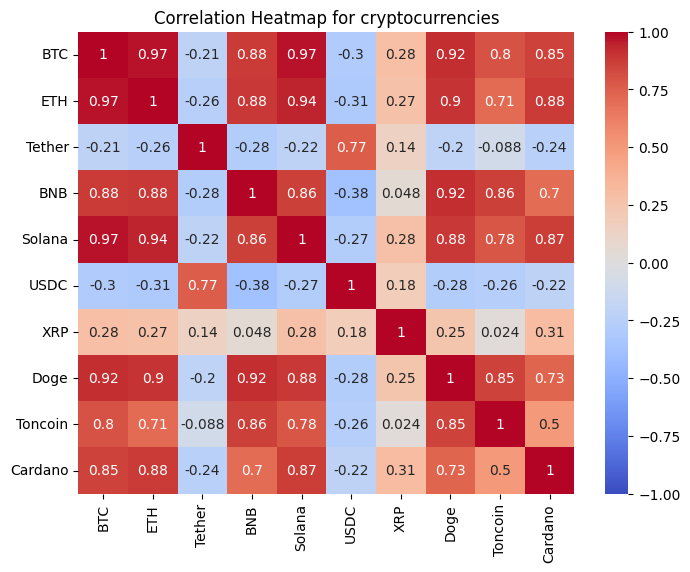

In [35]:
crypto_corr = crypto_df.iloc[:,1:].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(crypto_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for cryptocurrencies')
plt.show()

#### NFT data

In [36]:
nft_df = pd.read_excel('nft price.xlsx')
nft_df['date'] = pd.to_datetime(nft_df["date"], unit="ms")
nft_df

,date,Mutant Ape,Azuki,CryptoPunks,Bored Ape,Pudgy Penguins
0,2023-04-28,19616,26245,88980,92000,7069
1,2023-05-01,19234,27182,91541,86576,7294
2,2023-05-04,19834,28384,95674,89241,7521
3,2023-05-07,19621,27520,93561,89177,7679
4,2023-05-10,16866,24164,88347,75116,7735
...,...,...,...,...,...,...
118,2024-04-16,5044,11096,115308,31331,30762
119,2024-04-19,5140,10808,114149,32043,29891
120,2024-04-22,5783,11705,119964,6273,30720
121,2024-04-25,6879,12254,113568,38738,33981


In [37]:
nft_df.columns

Index(['date', 'Mutant Ape', 'Azuki', 'CryptoPunks', 'Bored Ape',
       'Pudgy Penguins'],
      dtype='object')

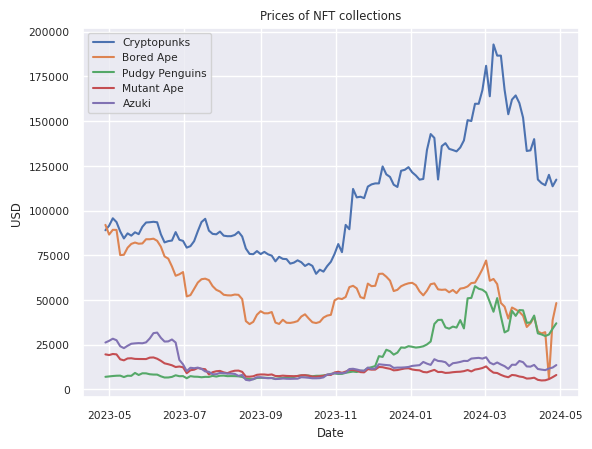

In [61]:
plt.plot(nft_df['date'], nft_df['CryptoPunks'])
plt.plot(nft_df['date'], nft_df['Bored Ape'])
plt.plot(nft_df['date'], nft_df['Pudgy Penguins'])
plt.plot(nft_df['date'], nft_df['Mutant Ape'])
plt.plot(nft_df['date'], nft_df['Azuki'])

plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Prices of NFT collections')

plt.legend(['Cryptopunks', 'Bored Ape', 'Pudgy Penguins', 'Mutant Ape', 'Azuki'])

plt.show()

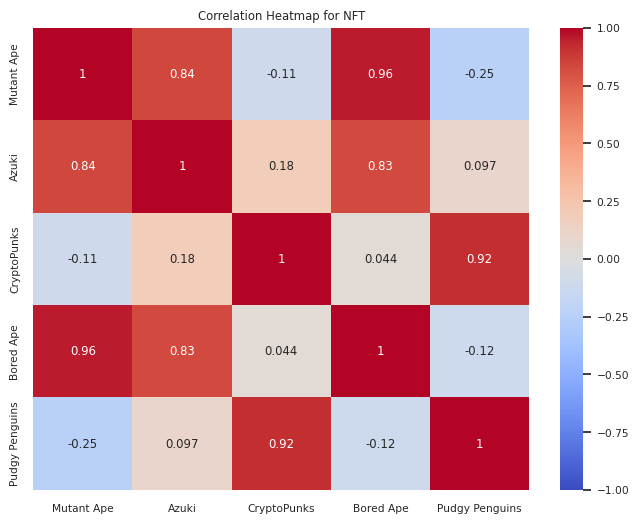

In [39]:
nft_corr = nft_df.iloc[:,1:].corr()

plt.figure(figsize=(8, 6))
sns.set(font_scale=0.7)
sns.heatmap(nft_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for NFT')
plt.show()

## Modeling - NFT vs Crypto

#### CryptoPunks

In [40]:
cryptopunks = pd.merge(nft_df[['date', 'CryptoPunks']], crypto_df, on='date', how='inner')
cryptopunks

,date,CryptoPunks,BTC,ETH,Tether,BNB,Solana,USDC,XRP,Doge,Toncoin,Cardano
0,2023-05-07,93561,28190.0,1845.91,0.988968,319.40,21.26,0.989722,0.451560,0.076363,2.03,0.375610
1,2023-05-19,85984,26517.0,1778.93,0.996111,306.50,20.22,0.990746,0.420341,0.071276,1.89,0.363333
2,2023-05-31,93327,26630.0,1818.77,0.994386,304.23,19.34,0.995812,0.467308,0.070966,1.84,0.362227
3,2023-06-12,86743,25510.0,1727.96,0.994607,233.39,13.66,0.995228,0.482318,0.058729,1.15,0.234622
4,2023-06-24,87957,26667.0,1715.10,0.992839,238.85,15.76,0.993220,0.473949,0.060948,1.36,0.253147
5,2023-07-06,80102,30236.0,1897.04,0.995062,237.00,18.54,0.994909,0.470645,0.065953,1.37,0.280578
6,2023-07-18,95385,29793.0,1883.08,0.995915,240.76,25.47,0.997189,0.686856,0.067313,1.33,0.307433
7,2023-07-30,88247,29095.0,1849.87,0.998078,236.72,23.22,0.997199,0.696036,0.076225,1.19,0.300811
8,2023-08-11,86359,28755.0,1807.95,0.996129,240.02,22.52,0.997699,0.605051,0.072519,1.19,0.284585
9,2023-08-23,75764,25575.0,1597.41,0.996619,204.21,19.66,0.996666,0.501182,0.060500,1.27,0.250525


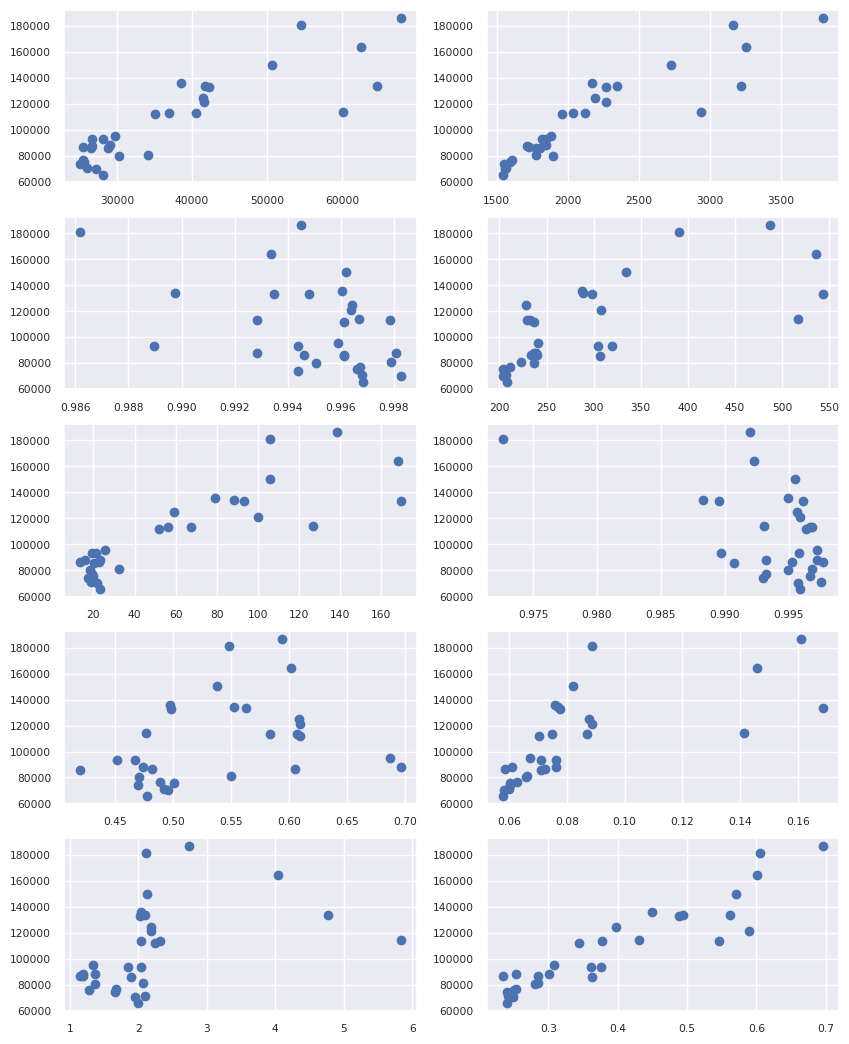

In [41]:
figure, axis = plt.subplots(5, 2, figsize=(10,13))

for i in range(5):
  axis[i,0].scatter(cryptopunks.iloc[:, i*2+2], cryptopunks['CryptoPunks'])
  axis[i,1].scatter(cryptopunks.iloc[:,i*2+3], cryptopunks['CryptoPunks'])

# 0: 2,3
# 1: 4,5



In [42]:
X = cryptopunks.iloc[:,2:]
y = cryptopunks['CryptoPunks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg_cryptopunk = sm.OLS(y_train, X_train).fit()
reg_cryptopunk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            CryptoPunks   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              655.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                    8.81e-14
Time:                        05:26:55   Log-Likelihood:                         -207.16
No. Observations:                  21   AIC:                                      434.3
Df Residuals:                      11   BIC:                                      444.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BTC           -1.9304      1.636     -1.180      0.263      -5.532       1.671
ETH           94.2726     33.845      2.785      0.018      19.779     168.766
Tether     -5.179e+04   6.51e+05     -0.080      0.938   -1.49e+06    1.38e+06
BNB          -91.3015     89.116     -1.025      0.328    -287.444     104.841
Solana       247.9987    188.111      1.318      0.214    -166.031     662.029
USDC        4.355e+04   6.47e+05      0.067      0.948   -1.38e+06    1.47e+06
XRP          1.98e+04   3.25e+04      0.609      0.555   -5.18e+04    9.14e+04
Doge       -3.612e+05   2.07e+05     -1.748      0.108   -8.16e+05    9.35e+04
Toncoin      881.7376   6925.231      0.127      0.901   -1.44e+04    1.61e+04
Cardano     3.958e+04   2.95e+04      1.341      0.207   -2.54e+04    1.05e+05
==============================================================================
Omnibus:                       12.434   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.529
Skew:                           1.390   Prob(JB):                      0.00517
Kurtosis:                       5.075   Cond. No.                     2.64e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.64e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
reg_cryptopunk.rsquared_adj

0.9968017503043523

In [44]:
np.sqrt(mean_squared_error(reg_cryptopunk.predict(X_test), y_test))

9803.816118470866

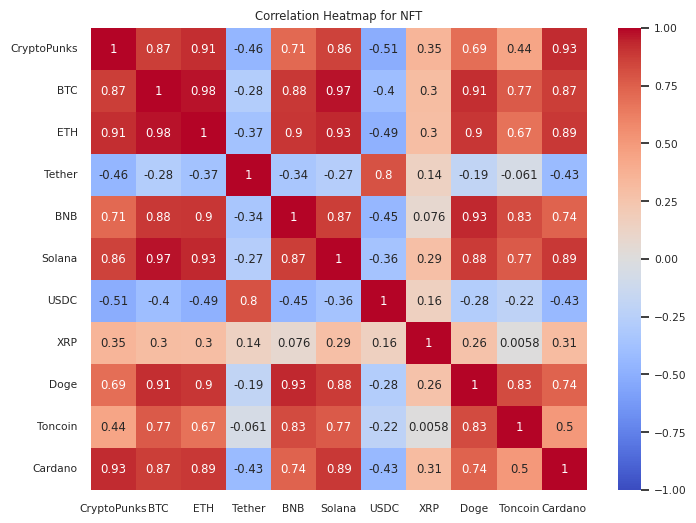

In [106]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.7)
sns.heatmap(cryptopunks.iloc[:,1:].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for NFT')
plt.show()

#### Bored Ape

In [45]:
bored_ape = pd.merge(nft_df[['date', 'Bored Ape']], crypto_df, on='date', how='inner')
bored_ape

,date,Bored Ape,BTC,ETH,Tether,BNB,Solana,USDC,XRP,Doge,Toncoin,Cardano
0,2023-05-07,89177,28190.0,1845.91,0.988968,319.40,21.26,0.989722,0.451560,0.076363,2.03,0.375610
1,2023-05-19,81358,26517.0,1778.93,0.996111,306.50,20.22,0.990746,0.420341,0.071276,1.89,0.363333
2,2023-05-31,83970,26630.0,1818.77,0.994386,304.23,19.34,0.995812,0.467308,0.070966,1.84,0.362227
3,2023-06-12,79811,25510.0,1727.96,0.994607,233.39,13.66,0.995228,0.482318,0.058729,1.15,0.234622
4,2023-06-24,63557,26667.0,1715.10,0.992839,238.85,15.76,0.993220,0.473949,0.060948,1.36,0.253147
5,2023-07-06,52730,30236.0,1897.04,0.995062,237.00,18.54,0.994909,0.470645,0.065953,1.37,0.280578
6,2023-07-18,61934,29793.0,1883.08,0.995915,240.76,25.47,0.997189,0.686856,0.067313,1.33,0.307433
7,2023-07-30,54743,29095.0,1849.87,0.998078,236.72,23.22,0.997199,0.696036,0.076225,1.19,0.300811
8,2023-08-11,53054,28755.0,1807.95,0.996129,240.02,22.52,0.997699,0.605051,0.072519,1.19,0.284585
9,2023-08-23,36536,25575.0,1597.41,0.996619,204.21,19.66,0.996666,0.501182,0.060500,1.27,0.250525


In [46]:
X = bored_ape.iloc[:,2:]
y = bored_ape.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg_bored_ape = sm.OLS(y_train, X_train).fit()
reg_bored_ape.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Bored Ape   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              55.61
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                    5.87e-08
Time:                        05:27:43   Log-Likelihood:                         -219.57
No. Observations:                  21   AIC:                                      459.1
Df Residuals:                      11   BIC:                                      469.6
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BTC           -2.7464      4.098     -0.670      0.517     -11.766       6.273
ETH           38.5175     75.689      0.509      0.621    -128.072     205.107
Tether     -9.984e+04   1.14e+06     -0.088      0.932    -2.6e+06     2.4e+06
BNB          100.4294    198.372      0.506      0.623    -336.185     537.043
Solana      -273.0303    399.607     -0.683      0.509   -1152.560     606.499
USDC        1.117e+05   1.13e+06      0.099      0.923   -2.38e+06     2.6e+06
XRP         3.226e+04   5.38e+04      0.599      0.561   -8.62e+04    1.51e+05
Doge        -3.13e+05   3.33e+05     -0.939      0.368   -1.05e+06    4.21e+05
Toncoin     5846.6562   1.37e+04      0.426      0.678   -2.44e+04    3.61e+04
Cardano     1.259e+05    5.3e+04      2.373      0.037    9130.452    2.43e+05
==============================================================================
Omnibus:                        4.462   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                2.395
Skew:                           0.692   Prob(JB):                        0.302
Kurtosis:                       3.907   Cond. No.                     2.69e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
reg_bored_ape.rsquared_adj

0.9629712962725889

In [48]:
np.sqrt(mean_squared_error(reg_bored_ape.predict(X_test), y_test))

11707.086537725036

#### Pudgy Penguins

In [49]:
penguin = pd.merge(nft_df[['date', 'Pudgy Penguins']], crypto_df, on='date', how='inner')
penguin

,date,Pudgy Penguins,BTC,ETH,Tether,BNB,Solana,USDC,XRP,Doge,Toncoin,Cardano
0,2023-05-07,7679,28190.0,1845.91,0.988968,319.40,21.26,0.989722,0.451560,0.076363,2.03,0.375610
1,2023-05-19,7622,26517.0,1778.93,0.996111,306.50,20.22,0.990746,0.420341,0.071276,1.89,0.363333
2,2023-05-31,9012,26630.0,1818.77,0.994386,304.23,19.34,0.995812,0.467308,0.070966,1.84,0.362227
3,2023-06-12,7357,25510.0,1727.96,0.994607,233.39,13.66,0.995228,0.482318,0.058729,1.15,0.234622
4,2023-06-24,7928,26667.0,1715.10,0.992839,238.85,15.76,0.993220,0.473949,0.060948,1.36,0.253147
5,2023-07-06,7448,30236.0,1897.04,0.995062,237.00,18.54,0.994909,0.470645,0.065953,1.37,0.280578
6,2023-07-18,7050,29793.0,1883.08,0.995915,240.76,25.47,0.997189,0.686856,0.067313,1.33,0.307433
7,2023-07-30,7686,29095.0,1849.87,0.998078,236.72,23.22,0.997199,0.696036,0.076225,1.19,0.300811
8,2023-08-11,7454,28755.0,1807.95,0.996129,240.02,22.52,0.997699,0.605051,0.072519,1.19,0.284585
9,2023-08-23,5798,25575.0,1597.41,0.996619,204.21,19.66,0.996666,0.501182,0.060500,1.27,0.250525


In [50]:
X = penguin.iloc[:,2:]
y = penguin.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg_penguin = sm.OLS(y_train, X_train).fit()
reg_penguin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Pudgy Penguins   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              43.95
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                    2.05e-07
Time:                        05:28:06   Log-Likelihood:                         -197.87
No. Observations:                  21   AIC:                                      415.7
Df Residuals:                      11   BIC:                                      426.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BTC            0.2131      1.082      0.197      0.847      -2.168       2.594
ETH            3.5058     20.929      0.168      0.870     -42.558      49.569
Tether      4.415e+04   8.19e+05      0.054      0.958   -1.76e+06    1.85e+06
BNB            8.9193     63.931      0.140      0.892    -131.792     149.631
Solana       303.8135    124.527      2.440      0.033      29.731     577.896
USDC       -2.405e+04   8.25e+05     -0.029      0.977   -1.84e+06    1.79e+06
XRP        -3.711e+04   2.17e+04     -1.714      0.115   -8.48e+04    1.06e+04
Doge       -2.311e+05   1.68e+05     -1.379      0.195      -6e+05    1.38e+05
Toncoin    -2610.7409   4301.055     -0.607      0.556   -1.21e+04    6855.817
Cardano     1.814e+04   2.58e+04      0.703      0.497   -3.86e+04    7.49e+04
==============================================================================
Omnibus:                       13.087   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.163
Skew:                           1.083   Prob(JB):                     0.000510
Kurtosis:                       6.555   Cond. No.                     4.90e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
reg_penguin.rsquared_adj

0.9533802223784212

In [52]:
np.sqrt(mean_squared_error(reg_penguin.predict(X_test), y_test))

6424.595496352414

#### Mutant Ape

In [53]:
mutant_ape = pd.merge(nft_df[['date', 'Mutant Ape']], crypto_df, on='date', how='inner')
mutant_ape

,date,Mutant Ape,BTC,ETH,Tether,BNB,Solana,USDC,XRP,Doge,Toncoin,Cardano
0,2023-05-07,19621,28190.0,1845.91,0.988968,319.40,21.26,0.989722,0.451560,0.076363,2.03,0.375610
1,2023-05-19,17447,26517.0,1778.93,0.996111,306.50,20.22,0.990746,0.420341,0.071276,1.89,0.363333
2,2023-05-31,16996,26630.0,1818.77,0.994386,304.23,19.34,0.995812,0.467308,0.070966,1.84,0.362227
3,2023-06-12,16021,25510.0,1727.96,0.994607,233.39,13.66,0.995228,0.482318,0.058729,1.15,0.234622
4,2023-06-24,12548,26667.0,1715.10,0.992839,238.85,15.76,0.993220,0.473949,0.060948,1.36,0.253147
5,2023-07-06,10736,30236.0,1897.04,0.995062,237.00,18.54,0.994909,0.470645,0.065953,1.37,0.280578
6,2023-07-18,11338,29793.0,1883.08,0.995915,240.76,25.47,0.997189,0.686856,0.067313,1.33,0.307433
7,2023-07-30,10367,29095.0,1849.87,0.998078,236.72,23.22,0.997199,0.696036,0.076225,1.19,0.300811
8,2023-08-11,10485,28755.0,1807.95,0.996129,240.02,22.52,0.997699,0.605051,0.072519,1.19,0.284585
9,2023-08-23,7143,25575.0,1597.41,0.996619,204.21,19.66,0.996666,0.501182,0.060500,1.27,0.250525


In [54]:
X = mutant_ape.iloc[:,2:]
y = mutant_ape.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg_mutant_ape = sm.OLS(y_train, X_train).fit()
reg_mutant_ape.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Mutant Ape   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              33.11
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                    9.06e-07
Time:                        05:28:15   Log-Likelihood:                         -188.41
No. Observations:                  21   AIC:                                      396.8
Df Residuals:                      11   BIC:                                      407.3
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BTC            0.1214      0.661      0.184      0.858      -1.334       1.577
ETH           -4.5889     12.933     -0.355      0.729     -33.054      23.876
Tether      1.909e+04   2.75e+05      0.069      0.946   -5.86e+05    6.25e+05
BNB           52.8576     37.183      1.422      0.183     -28.982     134.697
Solana      -116.0440     85.556     -1.356      0.202    -304.352      72.264
USDC       -2.085e+04    2.7e+05     -0.077      0.940   -6.15e+05    5.74e+05
XRP         1.503e+04   1.87e+04      0.804      0.438   -2.61e+04    5.61e+04
Doge       -7.166e+04   8.31e+04     -0.862      0.407   -2.55e+05    1.11e+05
Toncoin    -1113.2654   2539.537     -0.438      0.670   -6702.748    4476.217
Cardano     2.404e+04   1.81e+04      1.330      0.211   -1.58e+04    6.38e+04
==============================================================================
Omnibus:                        3.651   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.521
Skew:                           0.849   Prob(JB):                        0.284
Kurtosis:                       2.992   Cond. No.                     2.77e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
reg_mutant_ape.rsquared_adj

0.938605911782558

In [56]:
np.sqrt(mean_squared_error(reg_mutant_ape.predict(X_test), y_test))

2475.0670421252908

#### Azuki

In [57]:
azuki = pd.merge(nft_df[['date', 'Azuki']], crypto_df, on='date', how='inner')
azuki

,date,Azuki,BTC,ETH,Tether,BNB,Solana,USDC,XRP,Doge,Toncoin,Cardano
0,2023-05-07,27520,28190.0,1845.91,0.988968,319.40,21.26,0.989722,0.451560,0.076363,2.03,0.375610
1,2023-05-19,25557,26517.0,1778.93,0.996111,306.50,20.22,0.990746,0.420341,0.071276,1.89,0.363333
2,2023-05-31,26338,26630.0,1818.77,0.994386,304.23,19.34,0.995812,0.467308,0.070966,1.84,0.362227
3,2023-06-12,28877,25510.0,1727.96,0.994607,233.39,13.66,0.995228,0.482318,0.058729,1.15,0.234622
4,2023-06-24,26238,26667.0,1715.10,0.992839,238.85,15.76,0.993220,0.473949,0.060948,1.36,0.253147
5,2023-07-06,12132,30236.0,1897.04,0.995062,237.00,18.54,0.994909,0.470645,0.065953,1.37,0.280578
6,2023-07-18,10096,29793.0,1883.08,0.995915,240.76,25.47,0.997189,0.686856,0.067313,1.33,0.307433
7,2023-07-30,9257,29095.0,1849.87,0.998078,236.72,23.22,0.997199,0.696036,0.076225,1.19,0.300811
8,2023-08-11,8700,28755.0,1807.95,0.996129,240.02,22.52,0.997699,0.605051,0.072519,1.19,0.284585
9,2023-08-23,5059,25575.0,1597.41,0.996619,204.21,19.66,0.996666,0.501182,0.060500,1.27,0.250525


In [58]:
X = azuki.iloc[:,2:]
y = azuki.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg_azuki = sm.OLS(y_train, X_train).fit()
reg_azuki.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Azuki   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              13.41
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                    8.67e-05
Time:                        05:28:27   Log-Likelihood:                         -206.09
No. Observations:                  21   AIC:                                      432.2
Df Residuals:                      11   BIC:                                      442.6
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BTC           -0.0337      1.599     -0.021      0.984      -3.553       3.485
ETH           12.1092     32.266      0.375      0.715     -58.908      83.126
Tether     -9.555e+05   6.48e+05     -1.476      0.168   -2.38e+06     4.7e+05
BNB          113.6107     81.758      1.390      0.192     -66.338     293.560
Solana      -231.0317    172.416     -1.340      0.207    -610.518     148.454
USDC        9.576e+05    6.4e+05      1.497      0.162    -4.5e+05    2.37e+06
XRP        -2.743e+04   2.45e+04     -1.121      0.286   -8.13e+04    2.64e+04
Doge        -3.02e+05   1.99e+05     -1.516      0.158    -7.4e+05    1.36e+05
Toncoin    -1190.5811   6452.547     -0.185      0.857   -1.54e+04     1.3e+04
Cardano      2.79e+04   2.97e+04      0.939      0.368   -3.75e+04    9.33e+04
==============================================================================
Omnibus:                        1.319   Durbin-Watson:                   2.585
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.804
Skew:                           0.475   Prob(JB):                        0.669
Kurtosis:                       2.874   Cond. No.                     2.77e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
reg_azuki.rsquared_adj

0.8552955477054083

In [60]:
np.sqrt(mean_squared_error(reg_azuki.predict(X_test), y_test))

5955.649091160619

In [63]:
combined_df = pd.merge(nft_df, crypto_df, on='date', how='inner')
combined_df

,date,Mutant Ape,Azuki,CryptoPunks,Bored Ape,Pudgy Penguins,BTC,ETH,Tether,BNB,Solana,USDC,XRP,Doge,Toncoin,Cardano
0,2023-05-07,19621,27520,93561,89177,7679,28190.0,1845.91,0.988968,319.40,21.26,0.989722,0.451560,0.076363,2.03,0.375610
1,2023-05-19,17447,25557,85984,81358,7622,26517.0,1778.93,0.996111,306.50,20.22,0.990746,0.420341,0.071276,1.89,0.363333
2,2023-05-31,16996,26338,93327,83970,9012,26630.0,1818.77,0.994386,304.23,19.34,0.995812,0.467308,0.070966,1.84,0.362227
3,2023-06-12,16021,28877,86743,79811,7357,25510.0,1727.96,0.994607,233.39,13.66,0.995228,0.482318,0.058729,1.15,0.234622
4,2023-06-24,12548,26238,87957,63557,7928,26667.0,1715.10,0.992839,238.85,15.76,0.993220,0.473949,0.060948,1.36,0.253147
5,2023-07-06,10736,12132,80102,52730,7448,30236.0,1897.04,0.995062,237.00,18.54,0.994909,0.470645,0.065953,1.37,0.280578
6,2023-07-18,11338,10096,95385,61934,7050,29793.0,1883.08,0.995915,240.76,25.47,0.997189,0.686856,0.067313,1.33,0.307433
7,2023-07-30,10367,9257,88247,54743,7686,29095.0,1849.87,0.998078,236.72,23.22,0.997199,0.696036,0.076225,1.19,0.300811
8,2023-08-11,10485,8700,86359,53054,7454,28755.0,1807.95,0.996129,240.02,22.52,0.997699,0.605051,0.072519,1.19,0.284585
9,2023-08-23,7143,5059,75764,36536,5798,25575.0,1597.41,0.996619,204.21,19.66,0.996666,0.501182,0.060500,1.27,0.250525


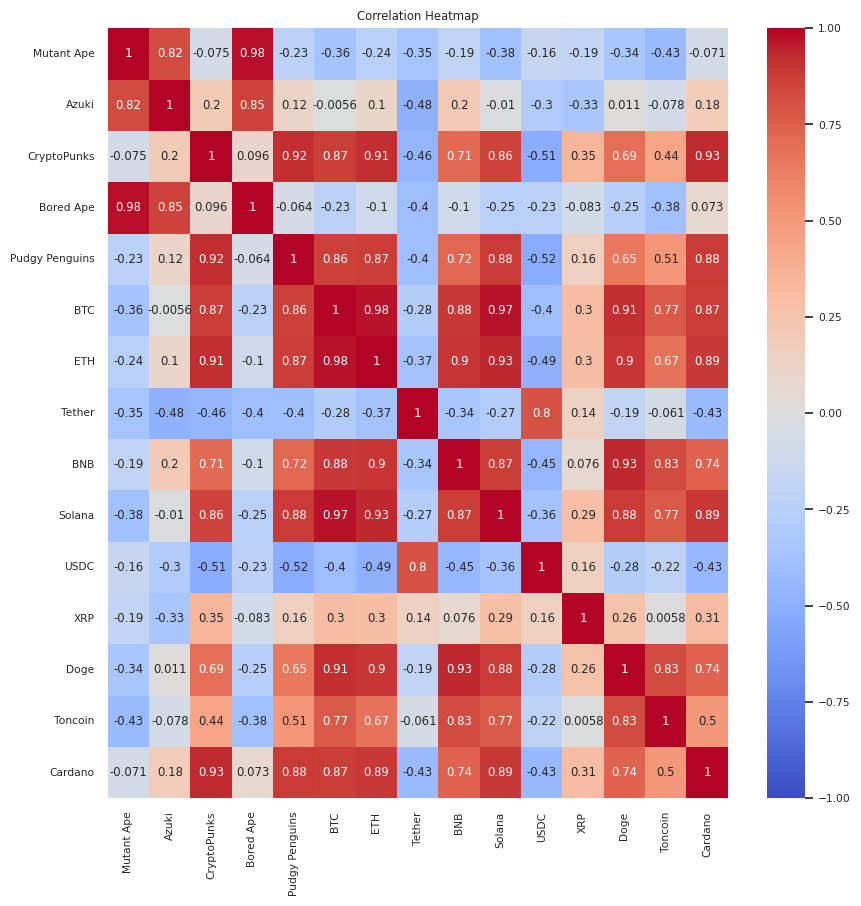

In [65]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.7)
sns.heatmap(combined_df.iloc[:,1:].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Average Prices from both markets

In [74]:
combined_df['nft_avg'] = (combined_df['Mutant Ape'] + combined_df['Azuki'] + combined_df['CryptoPunks'] + combined_df['Bored Ape'] +
                          combined_df['Pudgy Penguins']) / 5
combined_df['crypto_avg'] = (combined_df['BTC'] + combined_df['ETH'] + combined_df['Tether'] + combined_df['BNB'] +
                             combined_df['Solana'] + combined_df['USDC'] + combined_df['XRP'] + combined_df['Doge'] +
                             combined_df['Toncoin'] + combined_df['Cardano']) / 10

In [75]:
combined_df

,date,Mutant Ape,Azuki,CryptoPunks,Bored Ape,Pudgy Penguins,BTC,ETH,Tether,BNB,Solana,USDC,XRP,Doge,Toncoin,Cardano,nft_avg,crypto_avg
0,2023-05-07,19621,27520,93561,89177,7679,28190.0,1845.91,0.988968,319.40,21.26,0.989722,0.451560,0.076363,2.03,0.375610,47511.6,3038.148222
1,2023-05-19,17447,25557,85984,81358,7622,26517.0,1778.93,0.996111,306.50,20.22,0.990746,0.420341,0.071276,1.89,0.363333,43593.6,2862.738181
2,2023-05-31,16996,26338,93327,83970,9012,26630.0,1818.77,0.994386,304.23,19.34,0.995812,0.467308,0.070966,1.84,0.362227,45928.6,2877.707070
3,2023-06-12,16021,28877,86743,79811,7357,25510.0,1727.96,0.994607,233.39,13.66,0.995228,0.482318,0.058729,1.15,0.234622,43761.8,2748.892550
4,2023-06-24,12548,26238,87957,63557,7928,26667.0,1715.10,0.992839,238.85,15.76,0.993220,0.473949,0.060948,1.36,0.253147,39645.6,2864.084410
5,2023-07-06,10736,12132,80102,52730,7448,30236.0,1897.04,0.995062,237.00,18.54,0.994909,0.470645,0.065953,1.37,0.280578,32629.6,3239.275715
6,2023-07-18,11338,10096,95385,61934,7050,29793.0,1883.08,0.995915,240.76,25.47,0.997189,0.686856,0.067313,1.33,0.307433,37160.6,3194.669471
7,2023-07-30,10367,9257,88247,54743,7686,29095.0,1849.87,0.998078,236.72,23.22,0.997199,0.696036,0.076225,1.19,0.300811,34060.0,3120.906835
8,2023-08-11,10485,8700,86359,53054,7454,28755.0,1807.95,0.996129,240.02,22.52,0.997699,0.605051,0.072519,1.19,0.284585,33210.4,3082.963598
9,2023-08-23,7143,5059,75764,36536,5798,25575.0,1597.41,0.996619,204.21,19.66,0.996666,0.501182,0.060500,1.27,0.250525,26060.0,2740.035549


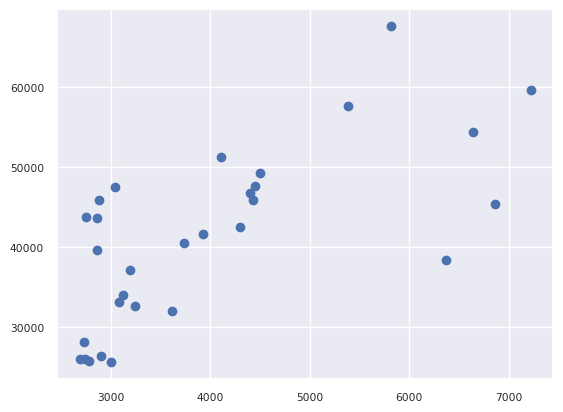

In [76]:
plt.scatter(combined_df['crypto_avg'], combined_df['nft_avg'])

plt.show()

In [79]:
slope = stats.linregress(combined_df['crypto_avg'], combined_df['nft_avg'])[0]
intercept = stats.linregress(combined_df['crypto_avg'], combined_df['nft_avg'])[1]

In [85]:
r_squared = stats.linregress(combined_df['crypto_avg'], combined_df['nft_avg'])[2] ** 2
r_squared

0.4718561117966007

In [87]:
p_val = stats.linregress(combined_df['crypto_avg'], combined_df['nft_avg'])[3]
p_val

2.7613459233655133e-05

In [80]:
def abline(slope, intercept):
     axes = plt.gca()
     x_vals = np.array(axes.get_xlim())
     y_vals = intercept + slope * x_vals
     plt.plot(x_vals, y_vals, '--')

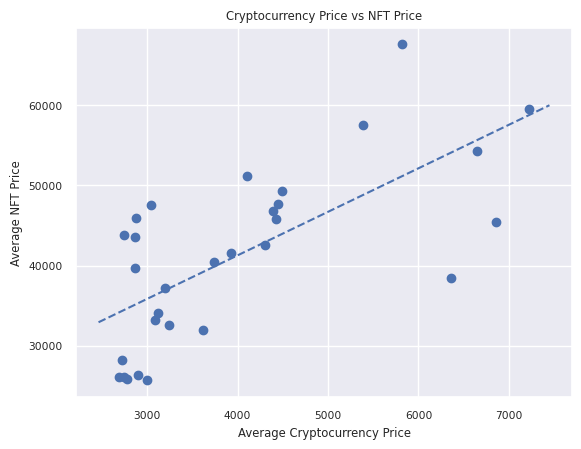

In [88]:
plt.scatter(combined_df['crypto_avg'], combined_df['nft_avg'])
abline(slope, intercept)

plt.xlabel('Average Cryptocurrency Price')
plt.ylabel('Average NFT Price')
plt.title('Cryptocurrency Price vs NFT Price')

plt.show()

## Modeling - Forecast for NFT

#### CryptoPunks

In [110]:
punk_value = nft_df['CryptoPunks'].values

In [109]:
adfuller(nft_df['CryptoPunks'].values)

(-1.4912631341112224,
 0.537828829155712,
 5,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 2253.5452931910954)

In [111]:
train_size = int(len(nft_df) * 0.8)
cryptopunk_train = punk_value[:train_size]
cryptopunk_test = punk_value[train_size:]

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
params = list(product(range(0,5,1), range(0,2,1), range(0,5,1)))

aic_list = defaultdict(float)

for p, d, q in params:
  try:
    model = sm.tsa.SARIMAX(cryptopunk_train, order = (p,d,q)).fit()
    aic = model.aic
    aic_list[(p,1,q)] = aic
  except:
    continue

aic_list

defaultdict(float,
            {(0, 1, 0): 1946.5158721484372,
             (0, 1, 1): 1948.413769441945,
             (0, 1, 2): 1950.1136982790415,
             (0, 1, 3): 1950.1241608295272,
             (0, 1, 4): 1952.0075197487542,
             (1, 1, 0): 1948.4119231708546,
             (1, 1, 1): 1948.901472442161,
             (1, 1, 2): 1950.7469972683423,
             (1, 1, 3): 1952.1138883877713,
             (1, 1, 4): 1953.784550751257,
             (2, 1, 0): 1949.9744055711146,
             (2, 1, 1): 1950.6780487249728,
             (2, 1, 2): 1952.7189947993036,
             (2, 1, 3): 1954.1090789585205,
             (2, 1, 4): 1954.589628355525,
             (3, 1, 0): 1949.8932125464967,
             (3, 1, 1): 1951.884096600716,
             (3, 1, 2): 1953.8611163216246,
             (3, 1, 3): 1954.154024091474,
             (3, 1, 4): 1955.83250187832,
             (4, 1, 0): 1951.919058445947,
             (4, 1, 1): 1953.9051739933316,
             (4, 1, 2)

In [115]:
sorted(aic_list.items(), key = lambda x:x[1])

[((0, 1, 0), 1946.5158721484372),
 ((1, 1, 0), 1948.4119231708546),
 ((0, 1, 1), 1948.413769441945),
 ((1, 1, 1), 1948.901472442161),
 ((3, 1, 0), 1949.8932125464967),
 ((2, 1, 0), 1949.9744055711146),
 ((0, 1, 2), 1950.1136982790415),
 ((0, 1, 3), 1950.1241608295272),
 ((2, 1, 1), 1950.6780487249728),
 ((1, 1, 2), 1950.7469972683423),
 ((3, 1, 1), 1951.884096600716),
 ((4, 1, 0), 1951.919058445947),
 ((0, 1, 4), 1952.0075197487542),
 ((1, 1, 3), 1952.1138883877713),
 ((2, 1, 2), 1952.7189947993036),
 ((1, 1, 4), 1953.784550751257),
 ((3, 1, 2), 1953.8611163216246),
 ((4, 1, 1), 1953.9051739933316),
 ((2, 1, 3), 1954.1090789585205),
 ((3, 1, 3), 1954.154024091474),
 ((2, 1, 4), 1954.589628355525),
 ((4, 1, 2), 1955.5856972217543),
 ((3, 1, 4), 1955.83250187832),
 ((4, 1, 3), 1955.9090444519202),
 ((4, 1, 4), 1957.8137717947413)]

In [141]:
arima_punk = sm.tsa.SARIMAX(cryptopunk_train, order = (3,1,3)).fit()
punk_pred = arima_punk.get_prediction(98,122).predicted_mean